<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Lanzamiento_de_monedas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre: Solis Procopio Uriel
# Materia: Simulación II
# **Ejemplo 1**: Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire.

**Paso 1**: Definición de variables

**x = "Lanzamiento de una moneda"**

**Paso 2**: Distribución de probabilidad de cada variable

|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)  |  0.5  |     0.5  |

**Paso 3:** Enumere la distribución acumulada de probabilidades de cada variable

|      |**Sol**|**Aguila**|
|------|-------|----------|
|f(x)  |  0.5  |   0.5    |
|F(x)  |  0.5  |   1      |

**Paso 4:**  Establezca el intervalo de números aleatorios correspondientes a cada valor de cada una de las variables

|           |**Sol**           |**Aguila**|
|-----------|-------           |----------|
|f(x)       |   0.5            |   0.5    |
|F(x)       |   0.5            |    1     |
|Intervalos |  0.00 a 0.49     | 0.5 a 1  |

**Paso 5:** Generar números aleatorios

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def volados(n): #"n" indica la cantidad de lanzamientos de moneda que se quiere simular
    caras = 0
    for i in range(n): 
        u = random.uniform(0,1) #u es un número aleatorio, el lanzamiento sigue una distribución uniforme(0,1) 
        if u <= 0.5: #Si u<= 0.5 entonces significa que la moneda ha salido cara
            caras += 1 # se invcrementa el valor de caras 
    return caras #La función retorna el número de veces que la moneda ha salido cara

**Paso 6:** Simule un lanzamiento

In [ ]:
def caras(m): #Cuenta el número de veces que se obtienen axactamente "m" caras 
    favorable = 0
    if volados(3) == m:# Simula 3 lanzamientos consecutivos de la moneda y lo comparamos con el número de "caras"
        favorable +=1# se incrementa el valor de los casos favorables
    return favorable #La función retorna el número de veces que la moneda ha salido cara

In [ ]:
def experimento(iteraciones): #Simula el experimento un número determinado de veces, es decir, el número de iteraciones
    i = 0 
    favorables=0 #Cuenta el número de veces que se obtienen dos caras en tres lanzamientos consecutivos
    Lista = [] #Lista vacia
    while i <= iteraciones:  # El objetivo de bucle es es repetir el experimento un número determinado de veces
        favorables = favorables + caras(2) # En cada iteración del bucle, se llama a la función "caras(2)" para simular 3 lanzamientos de moneda y contar el número de veces que se obtienen dos caras consecutivas
        i += 1 # Cuenta el número de iteraciones que se han realizado
        probabilidad = favorables/i# Calculo de la probabilidad de obtener dos caras consecutivas en tres lanzamientos de moneda
        Lista.append(probabilidad) #Registramos la probabilidad acumulada despues de cada iteración del experimento 
    return Lista #La función devuelve una lista de probabilidades acumuladas despues de cada iteración

In [ ]:
exp = experimento(1400) #Realizamos el experimento la cantidad de veces que deseemos 

In [ ]:
np.mean(exp) #calcula la media de la lista de números generados en el experimento

0.39271793097618535

**Paso 7:** Obtenga la gráfica de la estabilización que indica que el tamaño de muestra utilizado es suficiente para generalizar la convergencia del resultado.

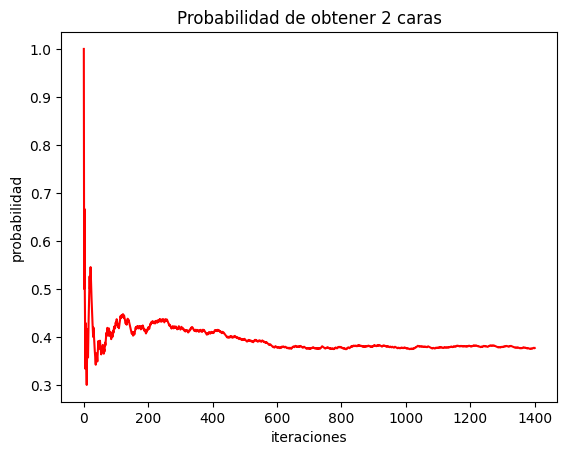

In [ ]:
plt.plot(exp,color="red") #Graficar
plt.xlabel('iteraciones') #Etiqueta del eje de las x
plt.ylabel('probabilidad') #Etiqueta del eje de las y
plt.title('Probabilidad de obtener 2 caras') #Titulo de la grafica
plt.show() #Mostrar la gráfica

**Paso 8:** Replique el modelo

In [ ]:
def simulacion_caras(repeticiones):#Simula la cantidad de veces que queramos de el experimento antes descrito
    List = [] #Lista vacia
    for i in range(repeticiones): #repite na cierta cantidad de veces la simulación 
        List.append(np.mean(experimento(1400))) #Para cada iteración de nuestro bucle la función llamada experimento realiza 1400 lanzamientos de la moneda y devuelve la probabilidad de obtener dos caras en tres lanzamientos
    return List #La función retorna una lista que contiene todas las probabilidades de obtener dos caras en tres lanzamientos

In [ ]:
simulacion = simulacion_caras(1000) #Repetimos la función simulacion_caras 50 veces y la renombramos como simulacion

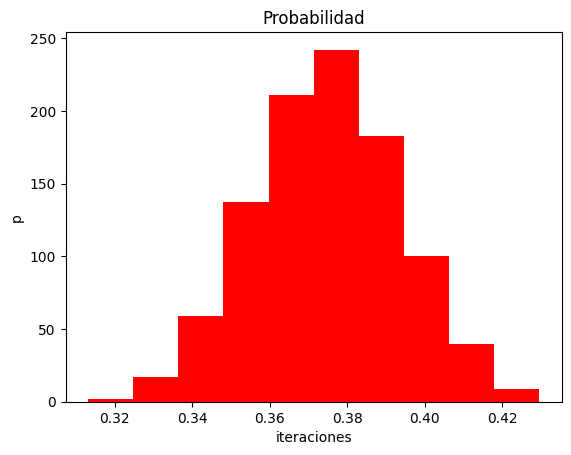

In [ ]:
plt.hist(simulacion,color="red") #Grafica un histograma
plt.xlabel('iteraciones') #Etiqueta del eje de las x
plt.ylabel('p') #Etiqueta del eje de las y
plt.title('Probabilidad') #Titulo del histograma
plt.show() #Mostramos la gráfica

**Paso 9:** Calcule la probabilidad de que aparezcan dos caras lanzando dos veces una moneda al aire y su desviación estandar 

In [ ]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion) #La primera entrada calcula la media, la segunda la varianza y finalmente su desviación estandar

(0.3748199219756827, 0.0003517362368611958, 0.018754632410719112)

**Paso 10:** Hallar el intervalo de confianza de la probabilidad que aparezcan dos caras lanzando tres veces una moneda al aire con un nivel de confianza del $95\%$ 

In [ ]:
# Calcular intervalo de confianza del 95%
media = np.mean(simulacion)
error_estandar = np.std(simulacion, ddof=1) / np.sqrt(len(simulacion))
intervalo = (media - 1.96 * error_estandar, media + 1.96 * error_estandar)

# Imprimir resultado
print(f"La probabilidad de obtener dos caras en tres lanzamientos es {media:.5f} con un intervalo de confianza del 95%: [{intervalo[0]:.5f}, {intervalo[1]:.5f}].")

La probabilidad de obtener dos caras en tres lanzamientos es 0.37482 con un intervalo de confianza del 95%: [0.37366, 0.37598].
